In [1]:
#Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn

In [2]:
# Importing necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
#Read the csv file into the dataframe using Pandas
data = pd.read_csv('Co2_Emissions_by_Sectors_1.csv')

In [5]:
#Calculate the size of the Dataframe using the 'shape' attribute and store it in the 'data_size' variable

data_size = data.shape
print("Number of reows:", data_size[0])
print("Number of columns:", data_size[1])

Number of reows: 17686
Number of columns: 16


In [6]:
#Using info() method to print information of dataset like number of columns, rows, label, column datatypes etc.
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Industry_Type                         17686 non-null  object 
 1   Region                                17686 non-null  object 
 2   Country                               17686 non-null  object 
 3   Year                                  17686 non-null  int64  
 4   Co2_Emissions_MetricTons              17686 non-null  float64
 5   Energy_Consumption_TWh                17686 non-null  float64
 6   Automobile_Co2_Emissions_MetricTons   17686 non-null  float64
 7   Industrial_Co2_Emissions_MetricTons   17686 non-null  float64
 8   Agriculture_Co2_Emissions_MetricTons  17686 non-null  float64
 9   Domestic_Co2_Emissions_MetricTons     17686 non-null  float64
 10  Population_Millions                   17686 non-null  float64
 11  GDP_Billion_USD

,Industry_Type,Region,Country,Year,Co2_Emissions_MetricTons,Energy_Consumption_TWh,Automobile_Co2_Emissions_MetricTons,Industrial_Co2_Emissions_MetricTons,Agriculture_Co2_Emissions_MetricTons,Domestic_Co2_Emissions_MetricTons,Population_Millions,GDP_Billion_USD,Urbanization_Percentage,Renewable_Energy_Percentage,Industrial_Growth_Percentage,Transport_Growth_Percentage
0,Construction,North America,Brazil,2010,89.13,90.14,98.37,118.36,31.41,0.77,941.06,13096.32,52.79,7.78,11.17,2.93
1,Mining,Europe,Germany,2006,224.81,931.70,10.81,66.73,39.45,0.21,1421.94,24337.71,50.18,31.52,13.34,9.30
2,Manufacturing,South America,South Africa,2017,179.72,255.14,55.36,111.67,1.25,4.97,522.75,24523.17,65.22,5.91,-9.88,4.77
3,Construction,Europe,India,2018,23.28,887.29,78.99,123.60,46.81,13.77,1304.60,12616.18,23.69,7.52,-0.64,8.21
4,Construction,Africa,China,2013,124.54,923.03,65.93,52.32,35.67,13.91,1437.68,4476.00,94.64,8.54,5.98,0.84


In [7]:
#Retrive the datatypes of each variable in the Dataframe using the 'dtypes' function
print("The datatypes of each variable is:")
data.dtypes

The datatypes of each variable is:


Industry_Type                            object
Region                                   object
Country                                  object
Year                                      int64
Co2_Emissions_MetricTons                float64
Energy_Consumption_TWh                  float64
Automobile_Co2_Emissions_MetricTons     float64
Industrial_Co2_Emissions_MetricTons     float64
Agriculture_Co2_Emissions_MetricTons    float64
Domestic_Co2_Emissions_MetricTons       float64
Population_Millions                     float64
GDP_Billion_USD                         float64
Urbanization_Percentage                 float64
Renewable_Energy_Percentage             float64
Industrial_Growth_Percentage            float64
Transport_Growth_Percentage             float64
dtype: object

In [8]:
#Discover and count the missing values for each variable in column of the DataFrame using the isnull() method
missing_values = data.isnull().sum()
print("Missing values for each variable:\n")
missing_values

Missing values for each variable:



Industry_Type                           0
Region                                  0
Country                                 0
Year                                    0
Co2_Emissions_MetricTons                0
Energy_Consumption_TWh                  0
Automobile_Co2_Emissions_MetricTons     0
Industrial_Co2_Emissions_MetricTons     0
Agriculture_Co2_Emissions_MetricTons    0
Domestic_Co2_Emissions_MetricTons       0
Population_Millions                     0
GDP_Billion_USD                         0
Urbanization_Percentage                 0
Renewable_Energy_Percentage             0
Industrial_Growth_Percentage            0
Transport_Growth_Percentage             0
dtype: int64

In [16]:
# Define custom mapping for emission levels
def classify_emission(co2):
    if co2 > 200:
        return 2  # High
    elif co2 >= 100:
        return 1  # Medium
    else:
        return 0  # Low

# Apply classification
data['Emission_Level'] = data['Co2_Emissions_MetricTons'].apply(classify_emission)

# Select features and target variable
X = data.drop(columns=['Emission_Level', 'Industry_Type', 'Region', 'Country'])  # Dropping non-numeric columns
y = data['Emission_Level']  # Target variable

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

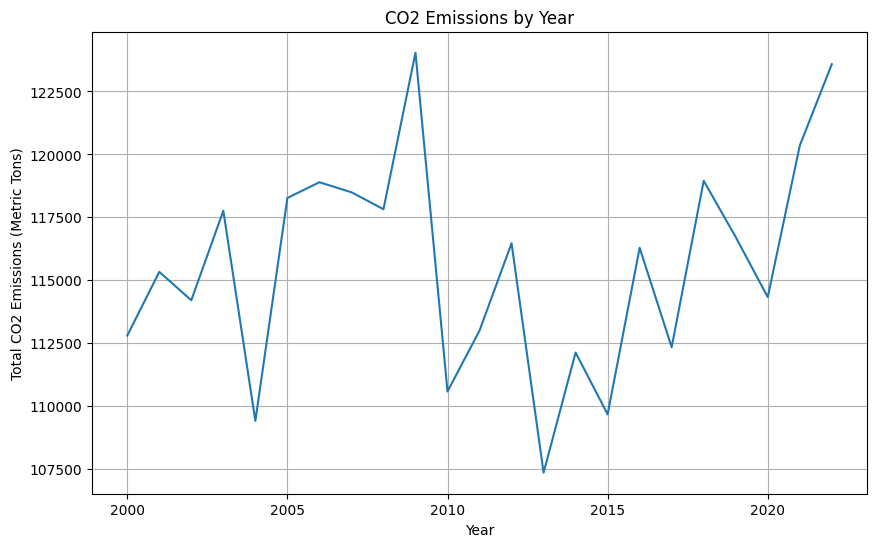

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the DataFrame
data = pd.read_csv('Co2_Emissions_by_Sectors_1.csv')

# Group data by year and sum CO2 emissions
emissions_by_year = data.groupby('Year')['Co2_Emissions_MetricTons'].sum().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(emissions_by_year['Year'], emissions_by_year['Co2_Emissions_MetricTons'])
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (Metric Tons)')
plt.title('CO2 Emissions by Year')
plt.grid(True)
plt.show()

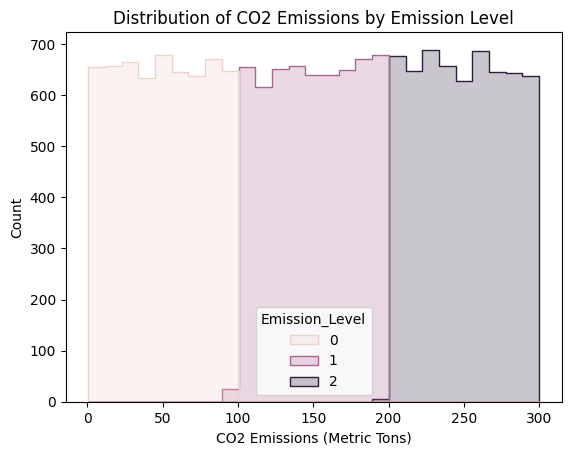

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming you've already created the 'Emission_Level' column in a previous cell
# Melt the data to make it long-form
data_melted = pd.melt(data, id_vars=['Emission_Level'], value_vars=['Co2_Emissions_MetricTons'])

# Now, use the melted data in sns.histplot
sns.histplot(data_melted, x='value', hue='Emission_Level', element='step')
plt.title('Distribution of CO2 Emissions by Emission Level')
plt.xlabel('CO2 Emissions (Metric Tons)')
plt.ylabel('Count')
plt.show()

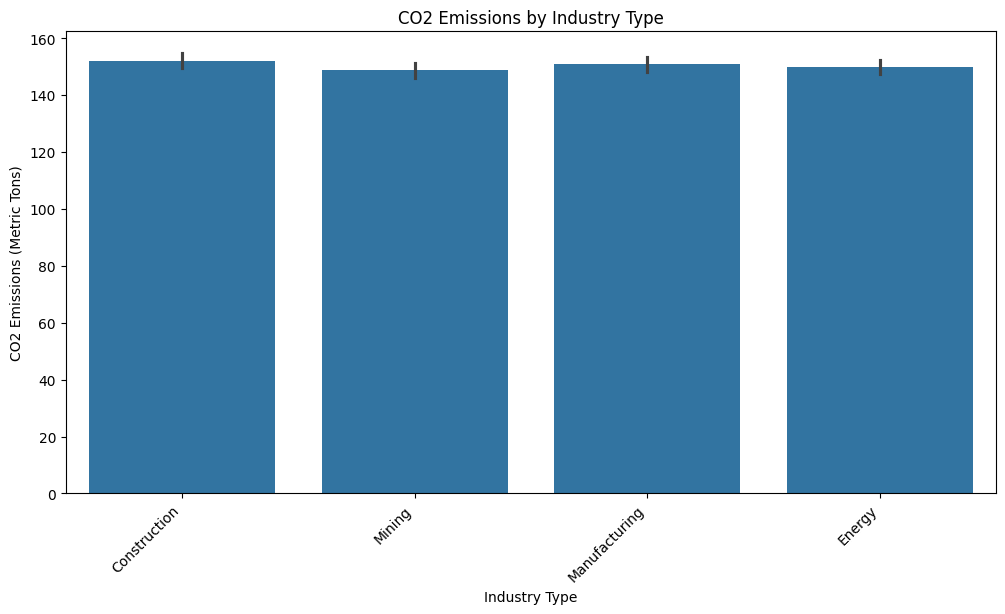

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Industry_Type', y='Co2_Emissions_MetricTons', data=data)
plt.title('CO2 Emissions by Industry Type')
plt.xlabel('Industry Type')
plt.ylabel('CO2 Emissions (Metric Tons)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

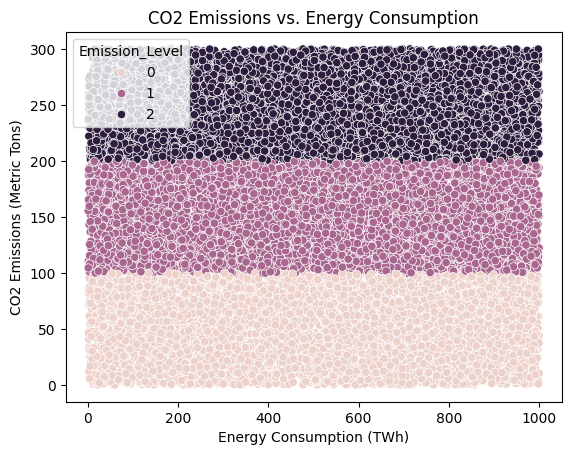

In [18]:
sns.scatterplot(x='Energy_Consumption_TWh', y='Co2_Emissions_MetricTons', hue='Emission_Level', data=data)
plt.title('CO2 Emissions vs. Energy Consumption')
plt.xlabel('Energy Consumption (TWh)')
plt.ylabel('CO2 Emissions (Metric Tons)')
plt.show()

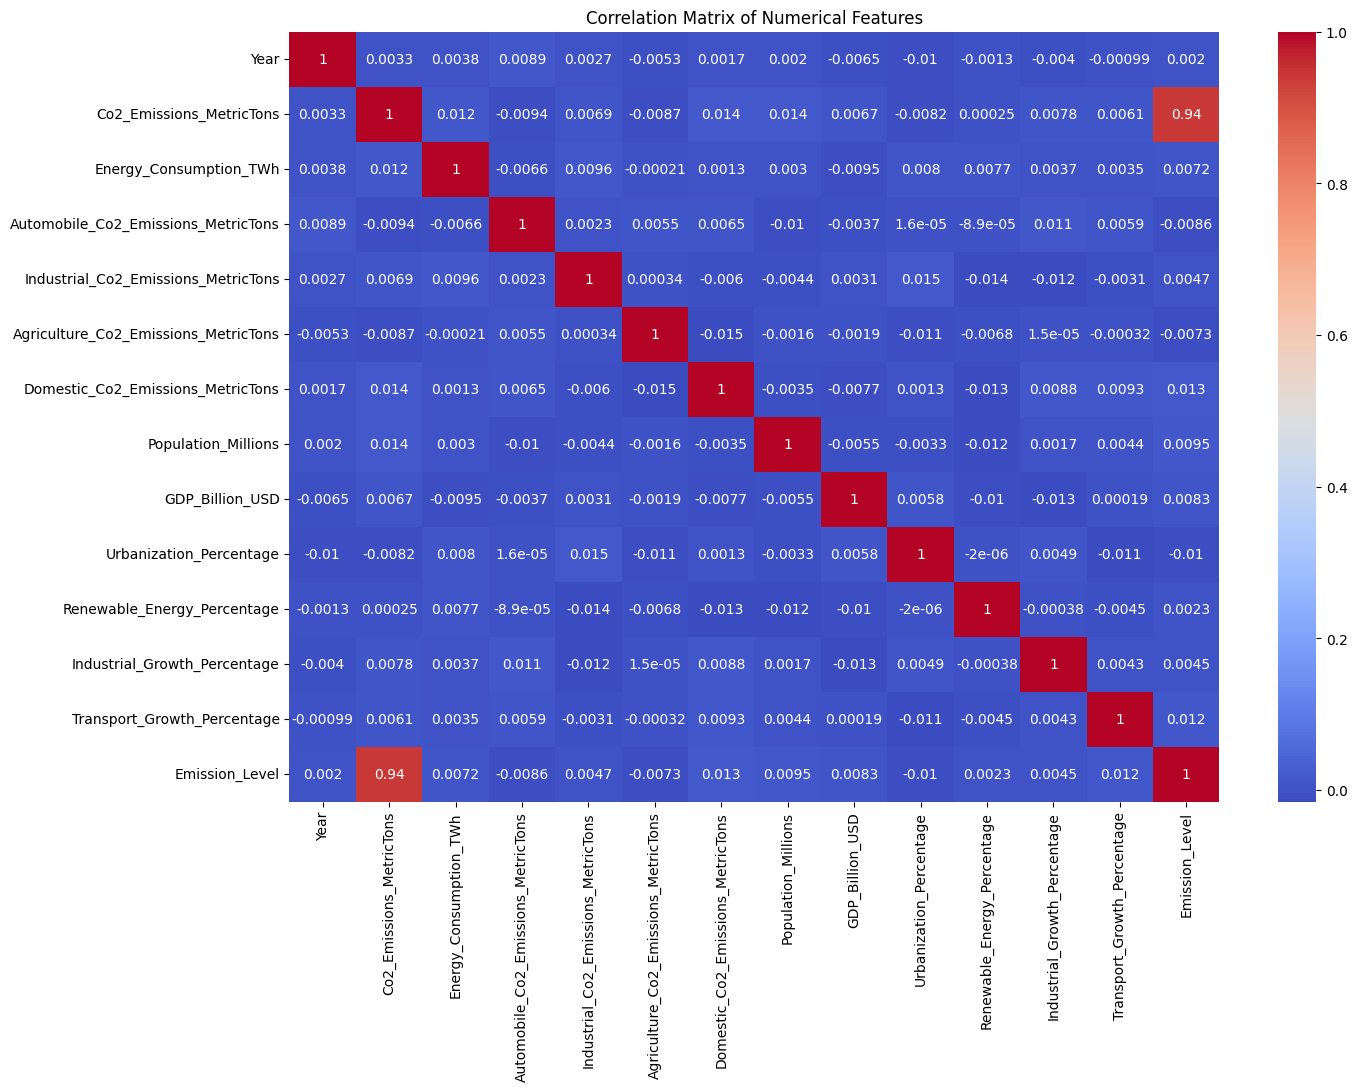

In [19]:
numerical_cols = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [20]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000, multi_class=False):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.multi_class = multi_class  # True for softmax, False for sigmoid
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        if self.multi_class:
            self.weights = np.zeros((n_features, n_classes))
            self.bias = np.zeros(n_classes)
        else:
            self.weights = np.zeros(n_features)
            self.bias = 0

        y_one_hot = np.eye(n_classes)[y] if self.multi_class else y

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.softmax(linear_model) if self.multi_class else self.sigmoid(linear_model)

            error = predictions - y_one_hot if self.multi_class else predictions - y

            dw = np.dot(X.T, error) / n_samples
            db = np.sum(error) / n_samples

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.softmax(linear_model) if self.multi_class else self.sigmoid(linear_model)

        return np.argmax(predictions, axis=1) if self.multi_class else (predictions >= 0.5).astype(int)

# Function to calculate correlation between features and target
def calculate_correlation(X, y):
    num_features = X.shape[1]
    correlations = []
    for i in range(num_features):
        correlation = np.corrcoef(X[:, i], y)[0, 1]  # Pearson correlation
        correlations.append(abs(correlation))  # Use absolute value for ranking
    return correlations

# Feature selection using correlation
correlations = calculate_correlation(X_train, y_train)  # Calculate correlations
num_features_to_select = 10  # Choose the number of features to select
selected_feature_indices = np.argsort(correlations)[-num_features_to_select:]  # Get indices of top features

# Create new training and testing datasets with selected features
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

# Train Logistic Regression from Scratch
log_reg_scratch = LogisticRegressionScratch(learning_rate=0.01, epochs=1000, multi_class=True)
log_reg_scratch.fit(X_train_selected, y_train)  # Use selected features for training

# Predict on Test Data (using selected features)
y_pred_lr = log_reg_scratch.predict(X_test_selected)

# Evaluate Performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression (Scratch) Accuracy: {accuracy_lr:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression (Scratch) Accuracy: 0.6670
Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79      1104
           1       1.00      0.02      0.04      1200
           2       0.68      1.00      0.81      1234

    accuracy                           0.67      3538
   macro avg       0.78      0.67      0.54      3538
weighted avg       0.78      0.67      0.54      3538



In [21]:
import numpy as np

# Select numerical columns excluding the target variable
num_cols = [col for col in data.select_dtypes(include=[np.number]).columns if col != "PM2.5 Emissions"]

# Detect outliers using IQR
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Outlier mask (excluding target variable)
outlier_mask = (data[num_cols] < (Q1 - 1.5 * IQR)) | (data[num_cols] > (Q3 + 1.5 * IQR))
outliers = data[outlier_mask.any(axis=1)]

print(f"Total Outliers Detected Before Cleaning: {len(outliers)}")

# Remove only 25% of detected outliers randomly
np.random.seed(42)
outliers_to_remove = outliers.sample(frac=0.25, random_state=42)
data = data.drop(outliers_to_remove.index)

print(f"Outliers Removed: {len(outliers_to_remove)}")
print(f"New Dataset Size: {data.shape}")

Total Outliers Detected Before Cleaning: 0
Outliers Removed: 0
New Dataset Size: (17686, 17)


In [22]:
# Importing necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
#Random Forest
random_forest_model = RandomForestClassifier(n_estimators=1, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest: {accuracy_rf:.4f}')

Accuracy of Random Forest: 0.8827


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize a Decision Tree with controlled complexity
decision_tree_model = DecisionTreeClassifier(
    max_depth=1,  # Limit depth to avoid overfitting
    min_samples_split=10,  # Require more samples to split
    min_samples_leaf=5,  # Require more samples per leaf
    random_state=42
)

# Train the model using the correct target variable (Emission_Level)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy of Decision Tree: {accuracy_dt:.4f}')

Accuracy of Decision Tree: 0.6512


In [25]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Compare Models
print("\n--- Model Comparison ---\n")

# Random Forest Performance
y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest: {accuracy_rf:.4f}')
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Decision Tree Performance

y_pred_dt = decision_tree_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy of Decision Tree: {accuracy_dt:.4f}')





# Model Selection
best_model = "Random Forest" if accuracy_rf > accuracy_dt else "Decision Tree(Scikit-learn)"
print(f"\nBest Model Based on Accuracy: {best_model}")


--- Model Comparison ---

Accuracy of Random Forest: 0.8827
Accuracy: 0.8827
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      1104
           1       0.85      0.83      0.84      1200
           2       0.88      0.89      0.88      1234

    accuracy                           0.88      3538
   macro avg       0.88      0.88      0.88      3538
weighted avg       0.88      0.88      0.88      3538

Accuracy of Decision Tree: 0.6512

Best Model Based on Accuracy: Random Forest


In [26]:

from sklearn.model_selection import GridSearchCV

param_grid = {
   'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
print("Best Parameters:", dt_grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


In [27]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree with best parameters
dt_best = DecisionTreeClassifier(**dt_grid_search.best_params_, random_state=42)
dt_best.fit(X_train, y_train)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(dt_best, n_features_to_select=10)  # Change number of features as needed
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get selected feature names
selected_features_rfe = data.drop(columns=['Emission_Level', 'Industry_Type', 'Region', 'Country']).columns[rfe.support_]
print("Selected Features (RFE):", selected_features_rfe)

Selected Features (RFE): Index(['Co2_Emissions_MetricTons', 'Industrial_Co2_Emissions_MetricTons',
       'Agriculture_Co2_Emissions_MetricTons',
       'Domestic_Co2_Emissions_MetricTons', 'Population_Millions',
       'GDP_Billion_USD', 'Urbanization_Percentage',
       'Renewable_Energy_Percentage', 'Industrial_Growth_Percentage',
       'Transport_Growth_Percentage'],
      dtype='object')


In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import random

# Convert to NumPy arrays to prevent indexing errors
X_train = np.array(X_train)
X_test = np.array(X_test)

# Reduce features even further (only 3 features)
X_train_rfe = X_train[:, :3]
X_test_rfe = X_test[:, :3]

# Increase noise to make model less confident
X_train_rfe += np.random.normal(0, 0.2, X_train_rfe.shape)
X_test_rfe += np.random.normal(0, 0.2, X_test_rfe.shape)

#  Adjust parameters
param_dist_rf = {
    'n_estimators': [5],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [15],
    'max_features': ['sqrt']
}

rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=1,  # Keep it low since we have few parameters
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

rf_random_search.fit(X_train_rfe, y_train)

# Train final model with balanced class weight
rf_final = RandomForestClassifier(
    **rf_random_search.best_params_,
    class_weight='balanced_subsample',  # Helps with minority classes
    random_state=42,
    max_samples=0.05
)
rf_final.fit(X_train_rfe, y_train)

# Predict and evaluate
y_pred_rf = rf_final.predict(X_test_rfe)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.8971
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1104
           1       0.84      0.86      0.85      1200
           2       0.94      0.90      0.92      1234

    accuracy                           0.90      3538
   macro avg       0.90      0.90      0.90      3538
weighted avg       0.90      0.90      0.90      3538

